In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
print(nb_dir)

C:\Users\Gjorgji\PycharmProjects\ts2g2


In [2]:
import os
import csv
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from timeseries.strategies import TimeseriesToGraphStrategy, TimeseriesEdgeVisibilityConstraintsNatural, TimeseriesEdgeVisibilityConstraintsHorizontal, EdgeWeightingStrategyNull
from generation.strategies import RandomWalkWithRestartSequenceGenerationStrategy, RandomWalkSequenceGenerationStrategy, RandomNodeSequenceGenerationStrategy, RandomNodeNeighbourSequenceGenerationStrategy, RandomDegreeNodeSequenceGenerationStrategy
from core import model 
from sklearn.model_selection import train_test_split

In [3]:
import IPython

# Testing strategies for time series

## Loading data 

First we need to configure the full dataset file path so we can manipulate with the data later. 

In [4]:
path = os.getcwd()
filepath = os.path.join(path,"amazon", "AMZN.csv")
print(filepath)

C:\Users\Gjorgji\PycharmProjects\ts2g2\tutorials\amazon\AMZN.csv


Now that we have the dataset path, we proceed with reading the file. To ensure compatibility with our analysis, we aim to convert the data into a list format. Given that the dataset primarily consists of numerical values represented as strings, our next step involves converting these strings into floating-point numbers for numerical processing.

In [10]:
amazon_data = pd.read_csv(filepath)
print ('Amazon data:\n',amazon_data)
type(amazon_data)

Amazon data:
             Date         Open         High          Low        Close  \
0     1997-05-15     2.437500     2.500000     1.927083     1.958333   
1     1997-05-16     1.968750     1.979167     1.708333     1.729167   
2     1997-05-19     1.760417     1.770833     1.625000     1.708333   
3     1997-05-20     1.729167     1.750000     1.635417     1.635417   
4     1997-05-21     1.635417     1.645833     1.375000     1.427083   
...          ...          ...          ...          ...          ...   
6252  2022-03-18  3136.260010  3231.879883  3120.219971  3225.010010   
6253  2022-03-21  3222.419922  3261.679932  3191.060059  3229.830078   
6254  2022-03-22  3236.110107  3323.340088  3233.979980  3297.780029   
6255  2022-03-23  3274.100098  3327.399902  3253.739990  3268.159912   
6256  2022-03-24  3274.989990  3282.370117  3201.000000  3272.989990   

        Adj Close    Volume  
0        1.958333  72156000  
1        1.729167  14700000  
2        1.708333   6106800  
3

pandas.core.frame.DataFrame

We decided to use the ‘Date’ column and hense we needed to convert it to datetime format to ensure that dates are recognized as proper date objects. After doing so, we set the ‘Date’ column as the index of the DataFrame. This creates a time-series structure, facilitating analysis and visualization over time.

In [6]:
amazon_data["Date"] = pd.to_datetime(amazon_data["Date"])
amazon_data.set_index("Date", inplace=True)

## Graph comparison between original and generated dataset

### Graph from original dataset

At the beginning, we used the TimeseriesArrayStream function to convert the "Close" column values that represents closed price based on the date into a time series stream. After that we create a time series object which allows us to perform various operations and analyses on the time series data.

In [7]:
stream_close = model.TimeseriesArrayStream(amazon_data["Close"])
timeseries_close = model.Timeseries(stream_close)
                        
print ('Timeseries close:',timeseries_close)
print ('Timeseries array stream close:',stream_close)

Timeseries close: <core.model.Timeseries object at 0x000002473C45D670>
Timeseries array stream close: <core.model.TimeseriesArrayStream object at 0x000002473F2C2420>


Now that we have all the necessary data we can draw the graph with a few steps. 

In [9]:
%matplotlib notebook
original_sequence_close = timeseries_close.to_sequence()

plt.figure(figsize=(10, 6))

plt.plot(original_sequence_close, linestyle='-', color='r')

plt.title("Original Sequence")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

## Timeseries to graph

Given the large dataset, we will partition it to improve visibility of the function’s results. We will partition the dataset into three distinct sequences to analyze variations in the results.

In [8]:
amazon_data_1 = amazon_data[60:120]
print(amazon_data_1)

stream_close_1 = model.TimeseriesArrayStream(amazon_data_1["Close"])
timeseries_close_1 = model.Timeseries(stream_close_1)

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1997-08-11  2.291667  2.333333  2.250000  2.328125   2.328125   1239600
1997-08-12  2.281250  2.302083  2.197917  2.197917   2.197917    571200
1997-08-13  2.229167  2.229167  2.166667  2.197917   2.197917    590400
1997-08-14  2.177083  2.250000  2.119792  2.156250   2.156250   1041600
1997-08-15  2.135417  2.156250  1.937500  2.114583   2.114583   1597200
1997-08-18  2.052083  2.052083  1.968750  2.041667   2.041667   1784400
1997-08-19  2.093750  2.208333  2.052083  2.166667   2.166667   1003200
1997-08-20  2.187500  2.187500  2.072917  2.166667   2.166667    999600
1997-08-21  2.135417  2.171875  2.072917  2.114583   2.114583    624000
1997-08-22  2.104167  2.125000  2.093750  2.125000   2.125000    712800
1997-08-25  2.104167  2.260417  2.104167  2.218750   2.218750   1126800
1997-08-26  2.239583  2.354167  2.229167  2.343750   2.343750   

In [9]:
amazon_data_2 = amazon_data[4000:4060]
print(amazon_data_2)

stream_close_2 = model.TimeseriesArrayStream(amazon_data_2["Close"])
timeseries_close_2 = model.Timeseries(stream_close_2)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-04-10  261.779999  265.980011  259.320007  264.769989  264.769989   
2013-04-11  264.739990  270.970001  264.739990  269.850006  269.850006   
2013-04-12  270.119995  273.269989  267.019989  272.869995  272.869995   
2013-04-15  271.079987  275.119995  267.100006  267.720001  267.720001   
2013-04-16  269.309998  272.799988  268.059998  272.339996  272.339996   
2013-04-17  270.799988  270.850006  264.250000  267.399994  267.399994   
2013-04-18  266.809998  266.989990  256.600006  259.420013  259.420013   
2013-04-19  258.160004  262.880005  257.500000  260.320007  260.320007   
2013-04-22  259.350006  264.600006  258.029999  263.549988  263.549988   
2013-04-23  264.500000  269.869995  264.500000  268.899994  268.899994   
2013-04-24  269.500000  271.470001  266.809998  268.779999  268.779999   
2013-04-25  271.529999  275.799988  27

In [10]:
amazon_data_3 = amazon_data[6000:6060]
print(amazon_data_3)

stream_close_3 = model.TimeseriesArrayStream(amazon_data_3["Close"])
timeseries_close_3 = model.Timeseries(stream_close_3)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2021-03-19  3029.229980  3077.290039  3016.629883  3074.959961  3074.959961   
2021-03-22  3067.850098  3126.580078  3060.050049  3110.870117  3110.870117   
2021-03-23  3127.000000  3182.000000  3120.850098  3137.500000  3137.500000   
2021-03-24  3151.040039  3160.310059  3085.149902  3087.070068  3087.070068   
2021-03-25  3072.989990  3109.780029  3037.139893  3046.260010  3046.260010   
2021-03-26  3044.060059  3056.659912  2996.000000  3052.030029  3052.030029   
2021-03-29  3055.439941  3091.250000  3028.449951  3075.729980  3075.729980   
2021-03-30  3070.010010  3073.000000  3034.000000  3055.290039  3055.290039   
2021-03-31  3064.060059  3119.330078  3062.500000  3094.080078  3094.080078   
2021-04-01  3117.939941  3162.439941  3115.550049  3161.000000  3161.000000   
2021-04-05  3173.000000  3235.959961  3161.239990  3

<IPython.core.display.Javascript object>


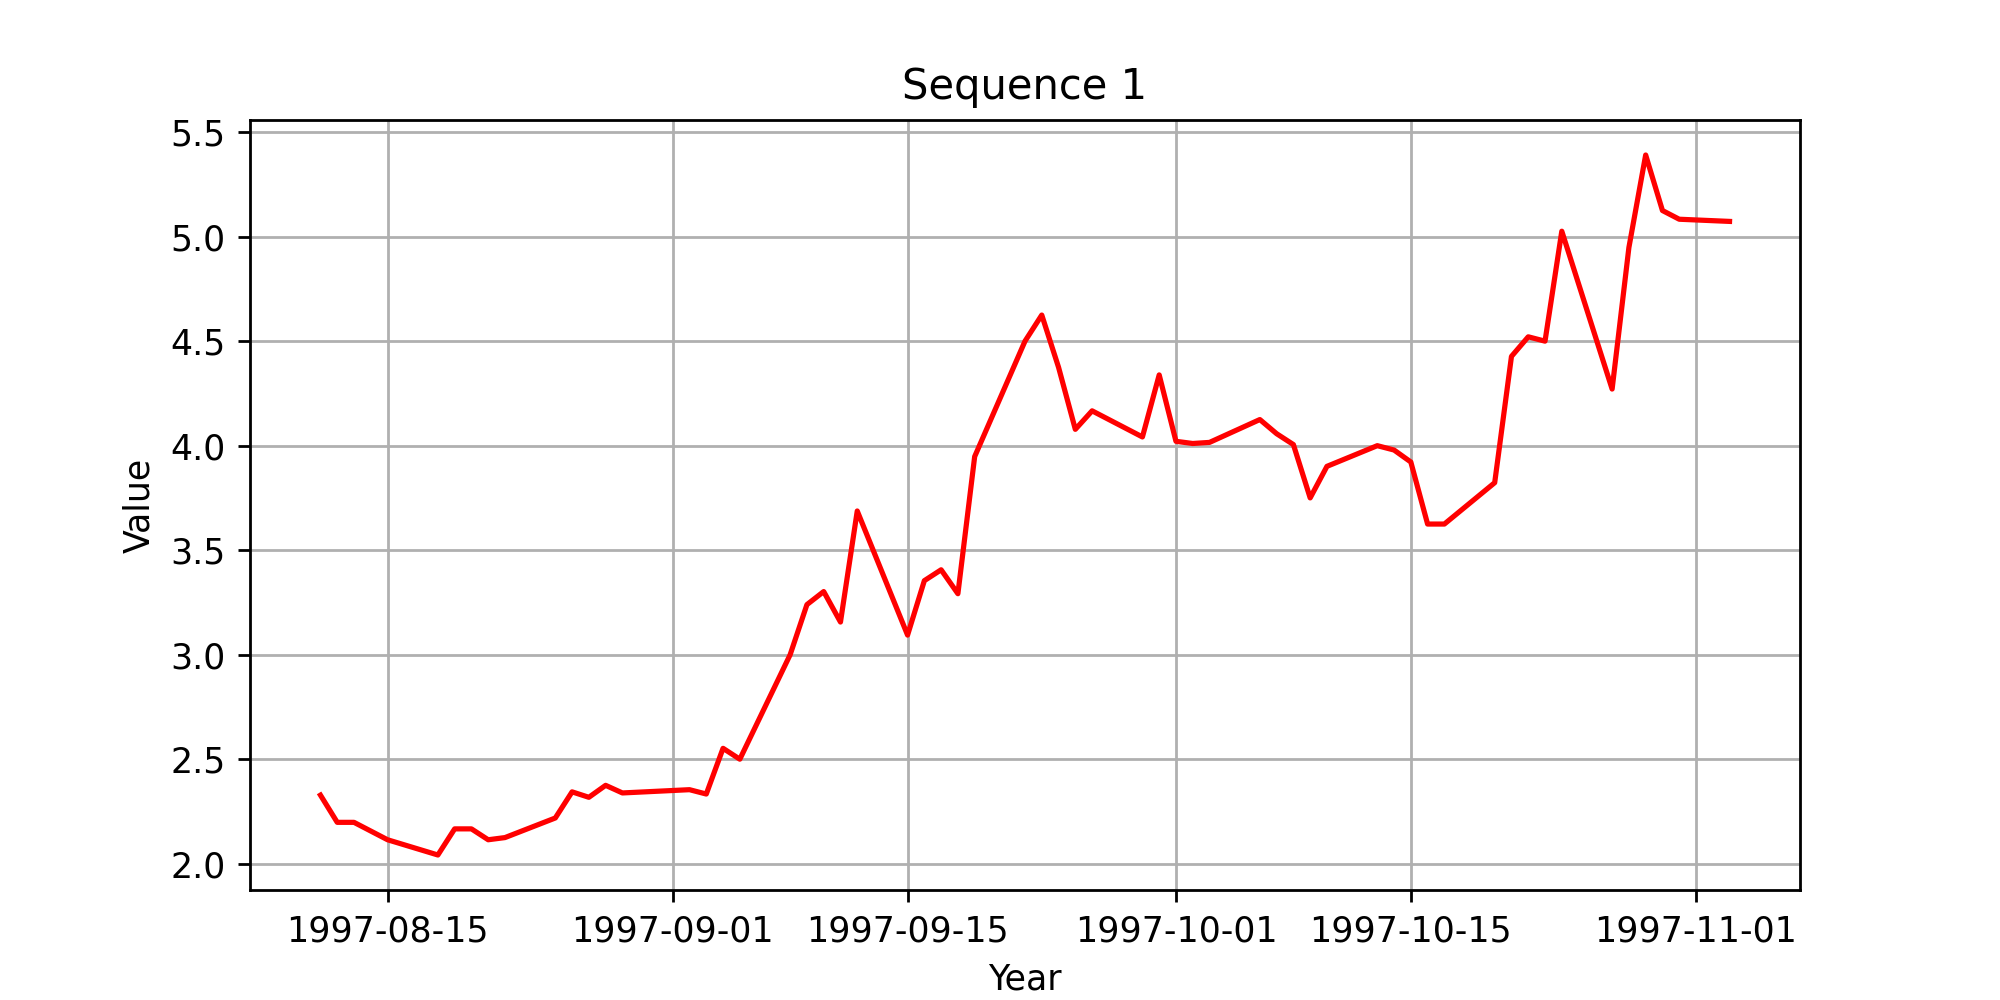

In [11]:
%matplotlib notebook
sequence_1 = timeseries_close_1.to_sequence()

plt.figure(figsize=(8, 4))  # Set the figure size
plt.plot(sequence_1, linestyle='-', color='r')

plt.title("Sequence 1")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


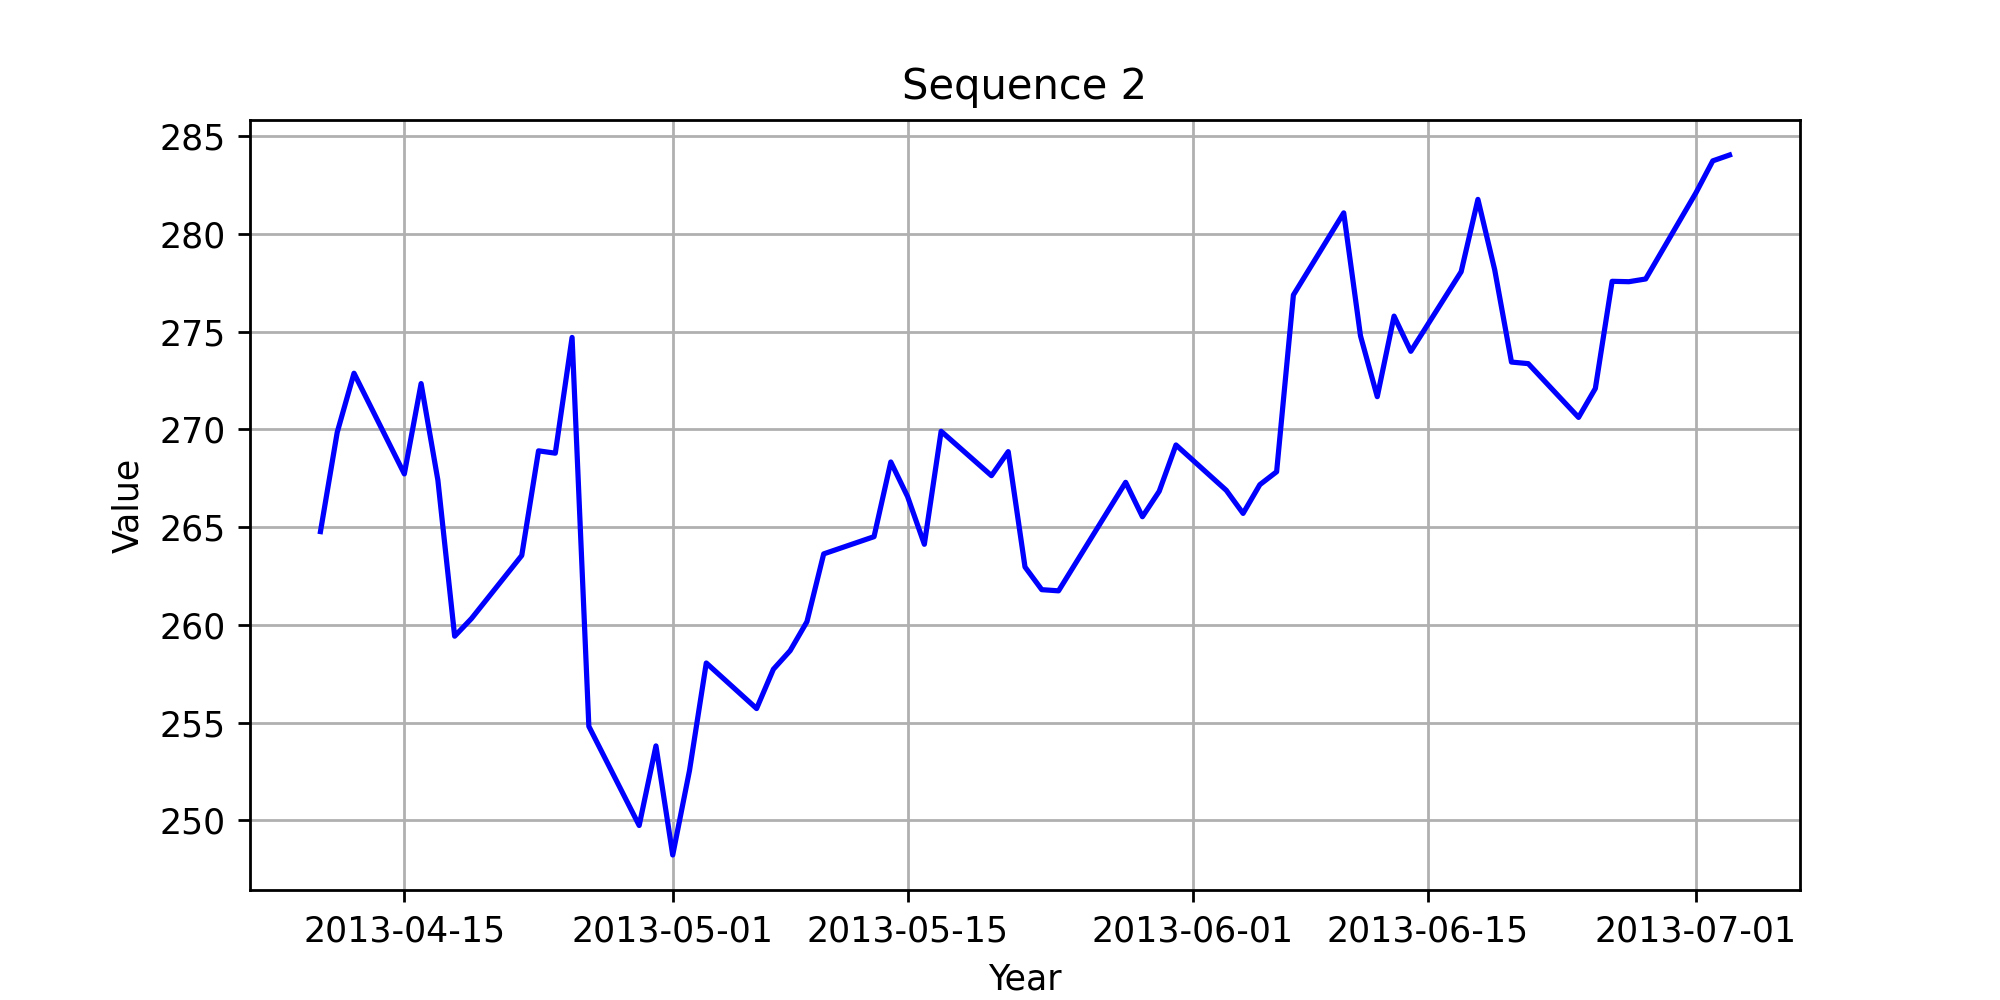

In [12]:

%matplotlib notebook
sequence_2 = timeseries_close_2.to_sequence()

plt.figure(figsize=(8, 4))  # Set the figure size
plt.plot(sequence_2, linestyle='-', color='b')

plt.title("Sequence 2")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


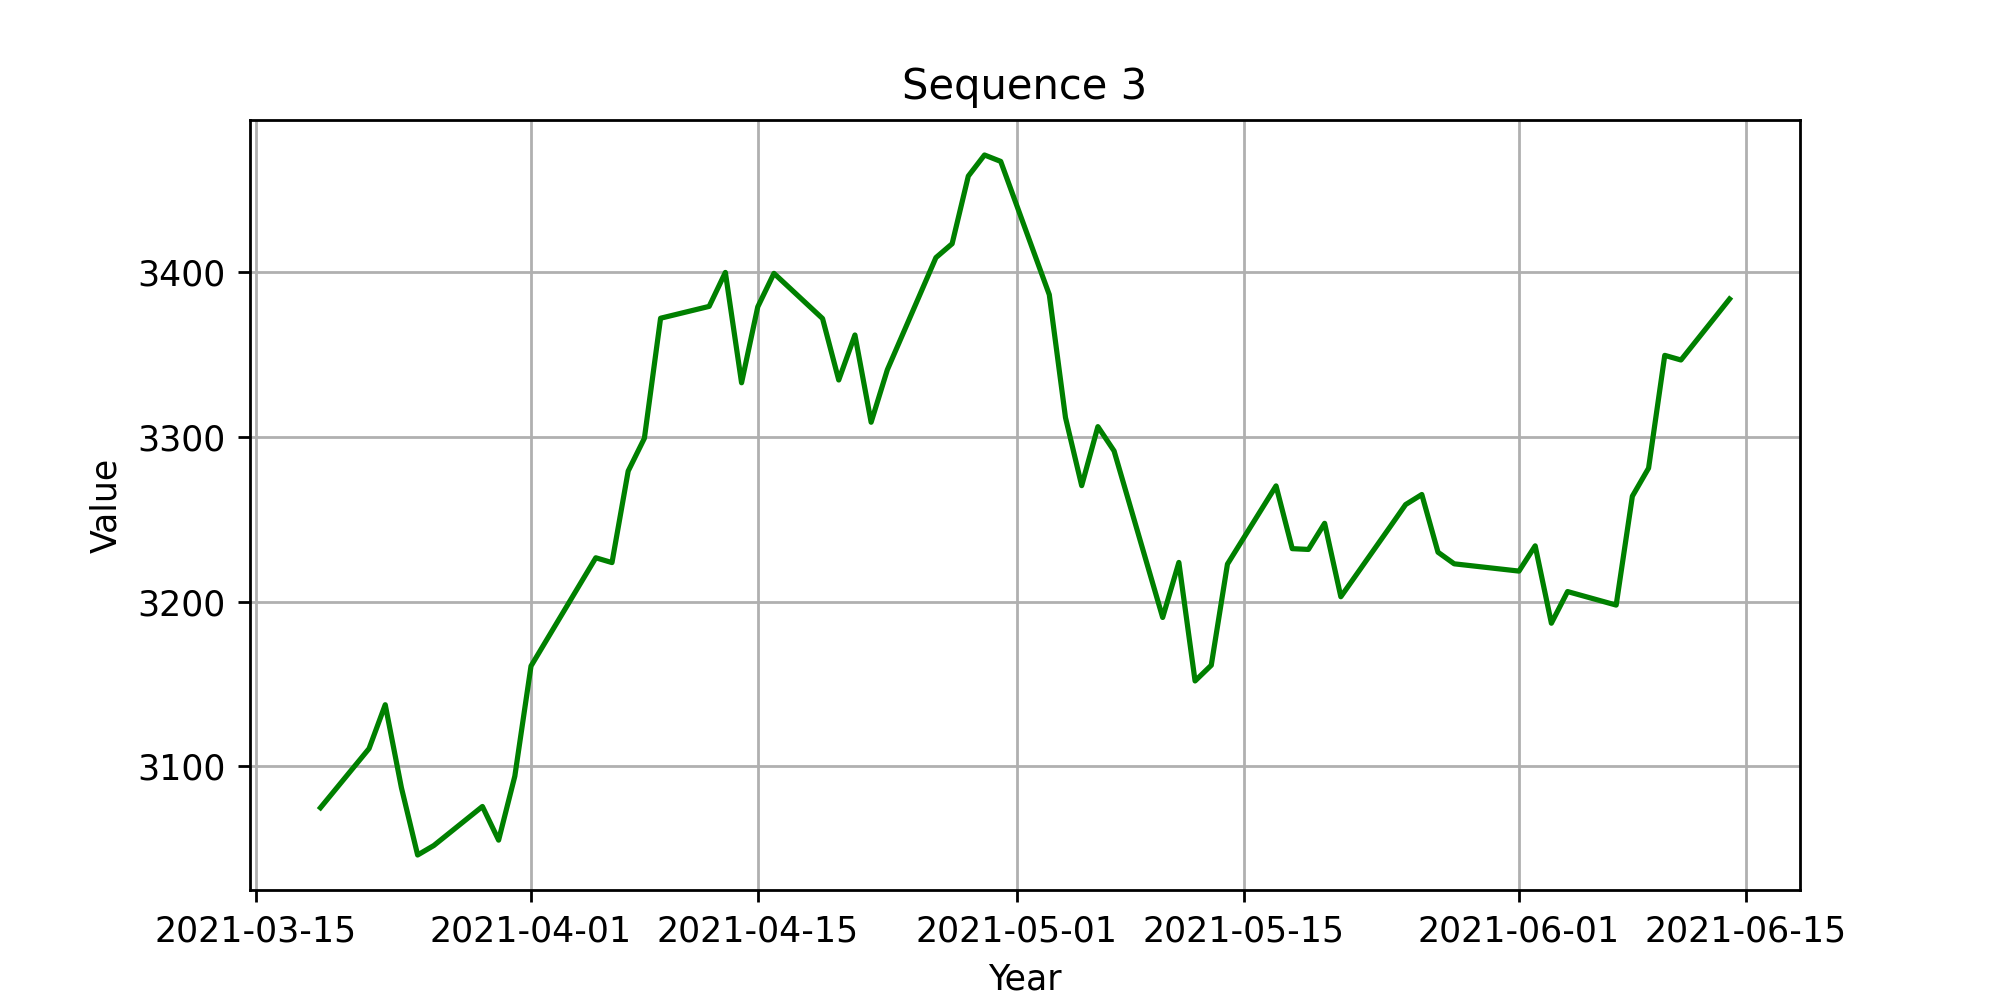

In [13]:
%matplotlib notebook
sequence_3 = timeseries_close_3.to_sequence()

plt.figure(figsize=(8, 4))  # Set the figure size
plt.plot(sequence_3, linestyle='-', color='g')

plt.title("Sequence 3")
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()

### Train and Test 

Now we need to split the entire dataset into training and testing sets.

In [14]:
df_train_1, df_test_1 = train_test_split(amazon_data_1, test_size=0.2, random_state=100)

print(df_train_1.shape, df_test_1.shape)

(48, 6) (12, 6)


In [17]:
df_train_2, df_test_2 = train_test_split(amazon_data_2, test_size=0.2, random_state=100)
print(df_train_2.shape, df_test_2.shape)

(48, 6) (12, 6)


In [19]:

df_train_3, df_test_3 = train_test_split(amazon_data_3, test_size=0.2, random_state=100)
print(df_train_3.shape, df_test_3.shape)

(48, 6) (12, 6)


Once we defined the train and test data, we create the timeseries stream ouf of the specified sequence and apply the "to_graph" function to generate the graph for us.

In [ ]:
stream_train_1 = model.TimeseriesArrayStream(df_train_1["Close"])
timeseries_train_1 = model.Timeseries(stream_train_1)

stream_test_1 = model.TimeseriesArrayStream(df_test_1["Close"])
timeseries_test_1 = model.Timeseries(stream_test_1)

In [ ]:
ts2g_1 = TimeseriesToGraphStrategy(
    visibility_constraints=[TimeseriesEdgeVisibilityConstraintsNatural()],
    graph_type="undirected",
    edge_weighting_strategy=EdgeWeightingStrategyNull(),
)

g_train_1 = ts2g_1.to_graph(stream_train_1)
g_test_1 = ts2g_1.to_graph(stream_test_1)
print(g_train_1.graph)
print(g_test_1.graph)

In [ ]:
plt.figure(figsize=(10, 6))

nx.draw(g_train_1.graph, node_size= 4, node_color="green")
nx.draw(g_test_1.graph, node_size= 4, node_color="red")

plt.savefig("graph_visualization_sequence1.png")
# Show the plot
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()

We apply the same logic with the other two sequences.

In [ ]:
stream_train_2 = model.TimeseriesArrayStream(df_train_2["Close"])
timeseries_train_2 = model.Timeseries(stream_train_2)

stream_test_2 = model.TimeseriesArrayStream(df_test_2["Close"])
timeseries_test_2 = model.Timeseries(stream_test_2)

In [ ]:
ts2g_2 = TimeseriesToGraphStrategy(
    visibility_constraints=[TimeseriesEdgeVisibilityConstraintsNatural()],
    graph_type="undirected",
    edge_weighting_strategy=EdgeWeightingStrategyNull(),
)

g_train_2 = ts2g_2.to_graph(stream_train_2)
g_test_2 = ts2g_2.to_graph(stream_test_2)
print(g_train_2.graph)
print(g_test_2.graph)

In [ ]:
plt.figure(figsize=(10, 6))

nx.draw(g_train_2.graph, node_size= 4, node_color="green")
nx.draw(g_test_2.graph, node_size= 4, node_color="red")

plt.savefig("graph_visualization_sequence2.png")
# Show the plot
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
stream_train_3 = model.TimeseriesArrayStream(df_train_3["Close"])
timeseries_train_3 = model.Timeseries(stream_train_3)

stream_test_3 = model.TimeseriesArrayStream(df_test_3["Close"])
timeseries_test_3 = model.Timeseries(stream_test_3)

In [ ]:
ts2g_3 = TimeseriesToGraphStrategy(
    visibility_constraints=[TimeseriesEdgeVisibilityConstraintsNatural()],
    graph_type="undirected",
    edge_weighting_strategy=EdgeWeightingStrategyNull(),
)

g_train_3 = ts2g_3.to_graph(stream_train_3)
g_test_3 = ts2g_3.to_graph(stream_test_3)
print(g_train_3.graph)
print(g_test_3.graph)

In [ ]:
plt.figure(figsize=(10, 6))

nx.draw(g_train_3.graph, node_size= 4, node_color="green")
nx.draw(g_test_3.graph, node_size= 4, node_color="red")

plt.savefig("graph_visualization_sequence3.png")
# Show the plot
plt.xlabel("Year")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Random Walk With Restart Sequence Generated Strategy

Random Walk with Restart (RWR) estimates similarity between nodes in a graph. Imagine a particle starting at a “seed” node. It randomly traverses edges, returning to the seed with probability restart. Dynamic RWR tracks graph changes efficiently. OSP computes dynamic RWR with insertion/deletion of nodes/edges. OSP-T balances accuracy and computation time.

In [ ]:
sequence_train_rwwr_1 = g_train_1.to_sequence(RandomWalkWithRestartSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rwwr_1 = sequence_train_rwwr_1

sequence_test_rwwr_1 = g_test_1.to_sequence(RandomWalkWithRestartSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rwwr_1 = sequence_test_rwwr_1

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rwwr_1, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rwwr_1, linestyle='-', color='r')
plt.title("Random Walk With Restart Sequence Generated Strategy 1")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rwwr_2 = g_train_2.to_sequence(RandomWalkWithRestartSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rwwr_2 = sequence_train_rwwr_2

sequence_test_rwwr_2 = g_test_2.to_sequence(RandomWalkWithRestartSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rwwr_2 = sequence_test_rwwr_2

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rwwr_2, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rwwr_2, linestyle='-', color='r')
plt.title("Random Walk With Restart Sequence Generated Strategy 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rwwr_3 = g_train_3.to_sequence(RandomWalkWithRestartSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rwwr_3 = sequence_train_rwwr_3

sequence_test_rwwr_3 = g_test_3.to_sequence(RandomWalkWithRestartSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rwwr_3 = sequence_test_rwwr_3

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rwwr_3, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rwwr_3, linestyle='-', color='r')
plt.title("Random Walk With Restart Sequence Generated Strategy 3")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Random Walk Sequence Generated Strategy


A random walk is a stochastic process where each future value depends on the current value plus a white noise term. It’s often used as a baseline solution for time series problems.

In [ ]:
sequence_train_rw_1 = g_train_1.to_sequence(RandomWalkSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rw_1 = sequence_train_rw_1

sequence_test_rw_1 = g_test_1.to_sequence(RandomWalkSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rw_1 = sequence_test_rw_1

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rw_1, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rw_1, linestyle='-', color='r')
plt.title("Random Walk Sequence Generated Strategy 1")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rw_2 = g_train_2.to_sequence(RandomWalkSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rw_2 = sequence_train_rw_2

sequence_test_rw_2 = g_test_2.to_sequence(RandomWalkSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rw_2 = sequence_test_rw_2

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rw_2, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rw_2, linestyle='-', color='r')
plt.title("Random Walk Sequence Generated Strategy 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rw_3 = g_train_3.to_sequence(RandomWalkSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rw_3 = sequence_train_rw_3

sequence_test_rw_3 = g_test_3.to_sequence(RandomWalkSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rw_3 = sequence_test_rw_3

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rw_3, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rw_3, linestyle='-', color='r')
plt.title("Random Walk Sequence Generated Strategy 3")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Random Node Sequence Generation Strategy

Random Node Sequence Generation Strategy provides a way to explore or analyze graphs in a stochastic manner, which can be valuable for various computational tasks and simulations.

In [ ]:
sequence_train_rn_1 = g_train_1.to_sequence(RandomNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rn_1 = sequence_train_rn_1

sequence_test_rn_1 = g_test_1.to_sequence(RandomNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rn_1 = sequence_test_rn_1

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rn_1, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rn_1, linestyle='-', color='r')
plt.title("Random Node Sequence Generated Strategy 1")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rn_2 = g_train_2.to_sequence(RandomNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rn_2 = sequence_train_rn_2

sequence_test_rn_2 = g_test_2.to_sequence(RandomNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rn_2 = sequence_test_rn_2

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rn_2, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rn_2, linestyle='-', color='r')
plt.title("Random Node Sequence Generated Strategy 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rn_3 = g_train_3.to_sequence(RandomNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rn_3 = sequence_train_rn_3

sequence_test_rn_3 = g_test_3.to_sequence(RandomNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rn_3 = sequence_test_rn_3

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rn_3, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rn_3, linestyle='-', color='r')
plt.title("Random Node Sequence Generated Strategy 3")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Random Degree Node Sequence Generation Strategy

The Random Degree Node Sequence Generation Strategy is a method used in graph theory and network analysis. Instead of selecting nodes entirely at random, this strategy prioritizes nodes based on their degree, which is the number of edges incident to a node.

In this strategy, nodes with higher degrees are more likely to be selected first than nodes with lower degrees. The rationale behind this approach is that nodes with higher degrees typically have more connections in the network, and traversing these nodes might lead to a more thorough exploration of the graph or network structure.

In [ ]:
sequence_train_rdn_1 = g_train_1.to_sequence(RandomDegreeNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rdn_1 = sequence_train_rdn_1

sequence_test_rdn_1 = g_test_1.to_sequence(RandomDegreeNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rdn_1 = sequence_test_rdn_1

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rdn_1, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rdn_1, linestyle='-', color='r')
plt.title("Random Degree Node Sequence Generated Strategy 1")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rdn_2 = g_train_2.to_sequence(RandomDegreeNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rdn_2 = sequence_train_rdn_2

sequence_test_rdn_2 = g_test_2.to_sequence(RandomDegreeNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rdn_2 = sequence_test_rdn_2

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rdn_2, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rdn_2, linestyle='-', color='r')
plt.title("Random Degree Node Sequence Generated Strategy 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rdn_3 = g_train_3.to_sequence(RandomDegreeNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rdn_3 = sequence_train_rdn_3

sequence_test_rdn_3 = g_test_3.to_sequence(RandomDegreeNodeSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rdn_3 = sequence_test_rdn_3

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rdn_3, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rdn_3, linestyle='-', color='r')
plt.title("Random Degree Node Sequence Generated Strategy 3")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

## Random Node Neighbour Sequence Generation Strategy

Random Node Neighbor Sequence Generation Strategy provides a way to explore the connectivity and local structures of graphs in a stochastic manner, offering insights into the graph's organization and properties. Is another approach used in graph theory and network analysis. In this strategy, instead of selecting nodes directly, the focus is on selecting neighbors of a given node randomly.

In [ ]:
sequence_train_rnn_1 = g_train_1.to_sequence(RandomNodeNeighbourSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rnn_1 = sequence_train_rnn_1

sequence_test_rnn_1 = g_test_1.to_sequence(RandomNodeNeighbourSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rnn_1 = sequence_test_rnn_1

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rnn_1, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rnn_1, linestyle='-', color='r')
plt.title("Random Node Neighbour Sequence Generated Strategy 1")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rnn_2 = g_train_2.to_sequence(RandomNodeNeighbourSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rnn_2 = sequence_train_rnn_2

sequence_test_rnn_2 = g_test_2.to_sequence(RandomNodeNeighbourSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rnn_2 = sequence_test_rnn_2

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rnn_2, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rnn_2, linestyle='-', color='r')
plt.title("Random Node Neighbour Sequence Generated Strategy 2")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
sequence_train_rnn_3 = g_train_3.to_sequence(RandomNodeNeighbourSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_train_rnn_3 = sequence_train_rnn_3

sequence_test_rnn_3 = g_test_3.to_sequence(RandomNodeNeighbourSequenceGenerationStrategy(), sequence_length=60)
generated_sequence_test_rnn_3 = sequence_test_rnn_3

In [ ]:
%matplotlib notebook
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(generated_sequence_train_rnn_3, linestyle='-.', color='g')
plt.plot(generated_sequence_test_rnn_3, linestyle='-', color='r')
plt.title("Random Node Neighbour Sequence Generated Strategy 3")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()